In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('googleplaystore.csv')

## Exercicio 1


In [3]:
dataset = dados.drop_duplicates()

## Exercicio 2

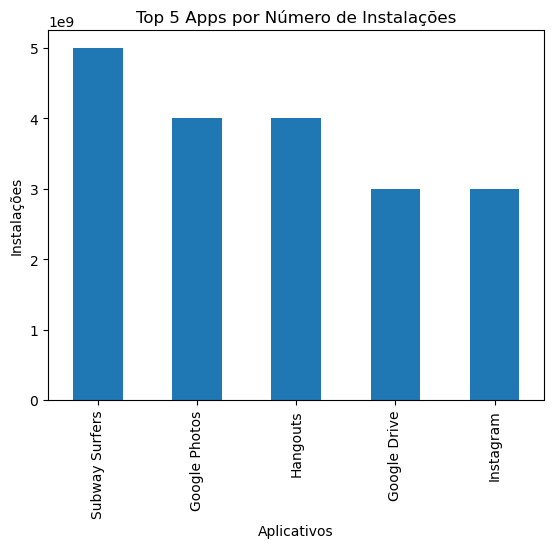

In [4]:
dataset1 = dataset.copy()
dataset1['Installs_Value'] = dataset['Installs'].str.replace(r',', '', regex=False)
dataset1['Installs_Value'] = dataset1['Installs_Value'].str.extract(r'(\d+\.?\d*)')
dataset1['Installs_Value'] = dataset1['Installs_Value'].astype(float)
dataset1['Installs_Value'] = dataset1['Installs_Value'].fillna(0)
filter1 = dataset1[['App', 'Installs_Value']].groupby(['App']).sum().sort_values('Installs_Value', ascending=False).head()

filter1.plot(kind='bar', legend=False)
plt.title('Top 5 Apps por Número de Instalações')
plt.ylabel('Instalações')
plt.xlabel('Aplicativos')
plt.show()

## Exercicio 3

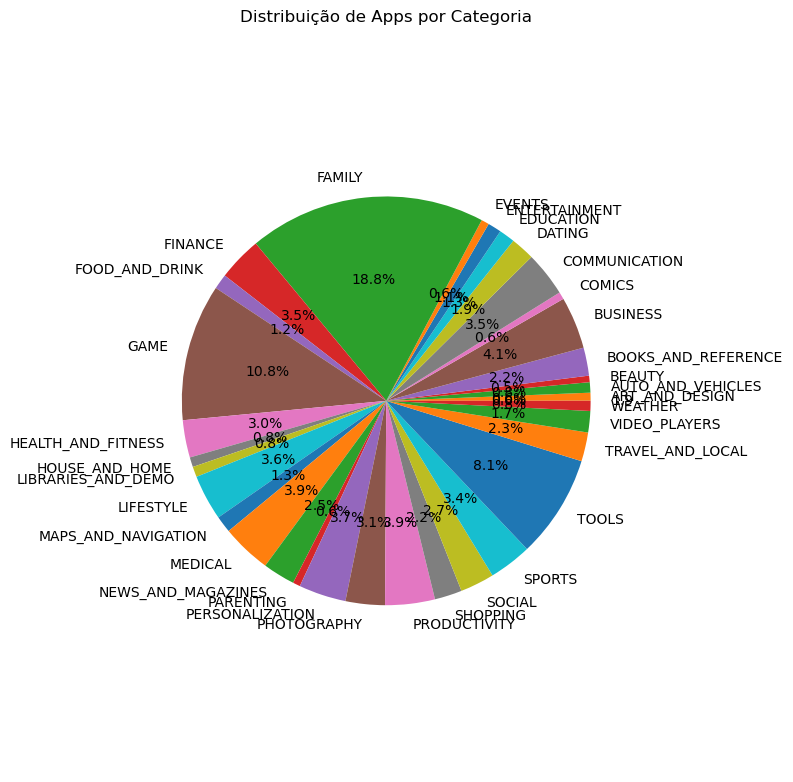

In [5]:
filter2 = dataset[['App', 'Category']].groupby(['Category']).count()

filter2 = filter2.rename(columns={'App': 'Total_Apps'})

plt.figure(figsize=(8, 8))
plt.pie(filter2['Total_Apps'], labels=filter2.index, autopct='%1.1f%%')
plt.title('Distribuição de Apps por Categoria')
plt.axis('equal')
plt.tight_layout()
plt.show()


## Exercicio 4

In [6]:
dataset1['Price_Value'] = dataset['Price'].str.extract(r'\$(\d+\.?\d*)')
dataset1['Price_Value'] = dataset1['Price_Value'].astype(float)
dataset1[['App', 'Price_Value']].sort_values('Price_Value', ascending=False).head(1)

,App,Price_Value
4367,I'm Rich - Trump Edition,400.0


## Exercicio 5

In [7]:
dataset[['App', 'Content Rating']].loc[dataset['Content Rating'] == 'Mature 17+'].groupby(['Content Rating']).count()

,App
Content Rating,
Mature 17+,447


## Exercicio 6

In [8]:
dataset1['Review_Value'] = dataset['Reviews'].str.extract(r'(\d+\.?\d*)')
dataset1['Review_Value'] = dataset1['Review_Value'].astype(float)
dataset1[['App', 'Review_Value']].groupby(['App']).sum().sort_values('Review_Value', ascending=False).head(10)

,Review_Value
App,
Instagram,199664676.0
Facebook,156286514.0
Subway Surfers,138606606.0
WhatsApp Messenger,138228988.0
Clash of Clans,134667058.0
Messenger – Text and Video Chat for Free,113289425.0
Candy Crush Saga,112134492.0
8 Ball Pool,99386198.0
Clash Royale,92530298.0


## Exercicio 7

In [9]:
lista1 = dataset1[['Review_Value','Category']].groupby(['Category']).sum().sort_values('Review_Value', ascending=False).head().reset_index().to_dict(orient='records')
lista1

[{'Category': 'GAME', 'Review_Value': 1415536650.0},
 {'Category': 'COMMUNICATION', 'Review_Value': 601273552.0},
 {'Category': 'SOCIAL', 'Review_Value': 533576829.0},
 {'Category': 'FAMILY', 'Review_Value': 396771969.0},
 {'Category': 'TOOLS', 'Review_Value': 273185044.0}]

In [10]:
filter7 = dataset1[['Category', 'Installs_Value']].groupby(['Category']).sum().sort_values('Installs_Value', ascending=False).head().reset_index().to_dict(orient='records')
i = 1
print('Catogorias com mais instalações')
for linha in filter7:
    print(f'{i} - Categoria {linha['Category']} com {linha['Installs_Value']} instalações')
    i += 1

Catogorias com mais instalações
1 - Categoria GAME com 31544024415.0 instalações
2 - Categoria COMMUNICATION com 24152276251.0 instalações
3 - Categoria SOCIAL com 12513867902.0 instalações
4 - Categoria PRODUCTIVITY com 12463091369.0 instalações
5 - Categoria TOOLS com 11452771915.0 instalações


## Exercicio 8

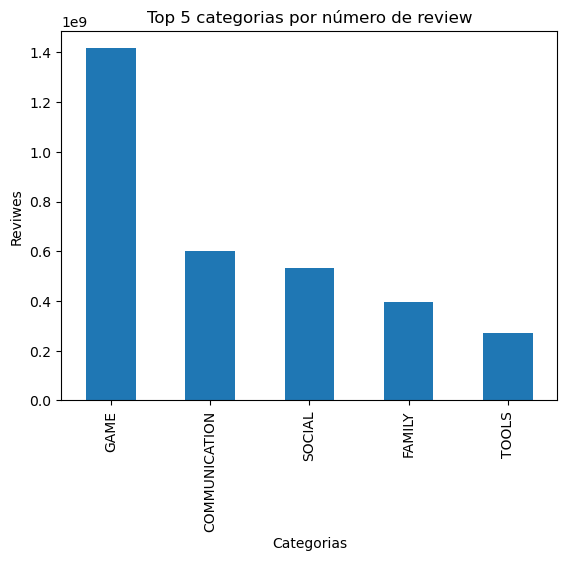

In [11]:
filter8 = dataset1[['Category', 'Review_Value']].groupby(['Category']).sum().sort_values('Review_Value', ascending=False).head()
filter8.plot(kind='bar', legend=False)
plt.title('Top 5 categorias por número de review')
plt.ylabel('Reviwes')
plt.xlabel('Categorias')
plt.show()

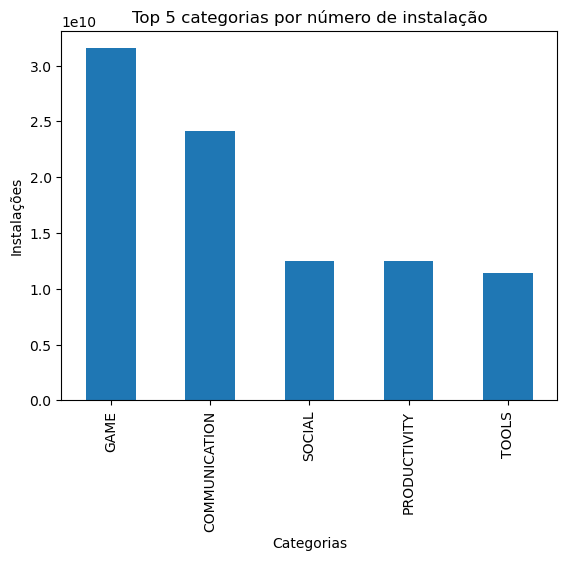

In [12]:
filter7 = dataset1[['Category', 'Installs_Value']].groupby(['Category']).sum().sort_values('Installs_Value', ascending=False).head()
filter7.plot(kind='bar', legend=False)
plt.title('Top 5 categorias por número de instalação')
plt.ylabel('Instalações')
plt.xlabel('Categorias')
plt.show()
